# solve_ODEs_CA3

## SAADBIN KHAN
 
## Computational Assignment 3 : Solving a system of ODEs with built-in solvers
 
## Inputs
$U_a, T_a, C_{P_A}, C_{P_B}, C_{P_C}, \Delta H_{r_1A}, \Delta H_{r_1A}, \frac{E_1}{R}, \frac{E_2}{R}$

## Outputs
$F_A, F_B, F_C, T$
 
## The system to be solved: 

 $\frac{dF_A}{dV}=r_A$

 $\frac{dF_B}{dV}=r_B$

 $\frac{dF_C} {dV} = r_C$

 $\frac{dT}{dV} = \frac{U_a(T_a-T)+(-r_{1A})(-H_{Rx1A})+(-r_{2A})(-H_{Rx2A})}{F_AC_{P_A} + F_BC_{P_B} + F_CC_{P_C}}$
 
 Inside the function ODE_CA3 we define all the relations necessary for the buildup of the ODEs that we will solve. The relations are as follows:
 
 $k_1A = 10 exp[\frac {E_1}{R} (\frac {1}{300}-\frac {1}{T})]s^{-1}$

 $k_2A = 0.09 exp[\frac {E_2}{R} (\frac {1} {300}-\frac {1}{T})] \frac{dm^3}{mol.s}$

 $\frac{E_1}{R} = 4000K; \frac{E_2}{R} = 9000K;$  
 
 $C_A = C_{T_0}(\frac{F_A}{F_T})(\frac{T_0}{T})$

 $C_B = C_{T_0}(\frac{F_B}{F_T})(\frac{T_0}{T})$

 $C_C = C_{T_0}(\frac{F_C}{F_T})(\frac{T_0}{T})$

 $r_1A = -k_{1A} C_A; r_2A = -k_{2A} C_A^2$

 $r_A = r_{1A}+r_{2A}; r_B = -r_{1A}; r_C = \frac{-r_{2A}}{2}$
 
 ## The PYTHON Script:

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

def solve_ODEs_CA3():
    Ua = 4000; # J/m3.s.C
    Ta = 373; # Kelvin
    CPA = 90; # J/mol.C
    CPB = 90; # J/mol.C
    CPC = 180; # J/mol.C
    delHR1A = -20000; # J/(mol of A reacted in reaction 1)
    delHR2A = -60000; # J/(mol of A reacted in reaction 2)
    E1overR = 4000; # Kelvin
    E2overR = 9000; # Kelvin
    CT0 = 0.1; # mol/dm3
    T0 = 423; # Kelvin

    ########### Function Definition ###########
    def ODEs_CA3(F_and_T,V): # Function to define the ODE system
    
        FT = F_and_T[0] + F_and_T[1] + F_and_T[2] # mol/s

        k1A = 10 * np.exp( E1overR * (1/300-1/F_and_T[3]) ) # dm3/mol.s
        k2A = 0.09 * np.exp( E2overR * (1/300-1/F_and_T[3]) ) # dm3/mol.s

        CA = CT0*(F_and_T[0]/FT)*(T0/F_and_T[3]) # mol/dm3
        CB = CT0*(F_and_T[1]/FT)*(T0/F_and_T[3]) # mol/dm3
        CC = CT0*(F_and_T[2]/FT)*(T0/F_and_T[3]) # mol/dm3
        r1A = -k1A*CA 
        r2A = -k2A*CA*CA
        r1B = -r1A
        r2C = -r2A/2
        rA = r1A + r2A
        rB = r1B
        rC = r2C

        dFAdV = rA # ODE 1
        dFBdV = rB # ODE 2
        dFCdV = rC # ODE 3
        dTdV  = ( Ua*(Ta-F_and_T[3]) + (-r1A)*(-delHR1A) + (-r2A)*(-delHR2A) ) / (F_and_T[0]*CPA + F_and_T[1]*CPB + F_and_T[2]*CPC) # ODE 4

        diff = [dFAdV, dFBdV, dFCdV, dTdV]
        return diff # Output of the ODE system function
    ########### Function ends here ###########

    init = [100,0,0,423]; # Initial values 
    V = np.linspace(0.0,1.0,101); # Span of depndent variable V in dm3
    #print(vspan)
    solution = odeint(ODEs_CA3,init,V) # Solving the ODE system


    ########### Plotting ###########

    # Figure 1 plot
    plt.figure(figsize=(20,16))
    plt.plot(solution[:,3],'-k',linewidth=2.5)
    plt.legend([r'$T$'],loc='lower right',fontsize=30)
    plt.xlabel(r'$V (dm^3)$', fontsize=30)
    plt.ylabel(r'$T(K)$', fontsize=30)
    plt.tick_params(axis='both', labelsize=30)
    plt.savefig('T.png',dpi=100)
    plt.show()

    # Figure 2 plot
    plt.figure(figsize=(20,16))
    plt.plot(V,solution[:,0],'-b',linewidth=2.5)
    plt.plot(V,solution[:,1],'--g',linewidth=2.5)
    plt.plot(V,solution[:,2],':r',linewidth=2.5)
    plt.legend([r'$F_A$',r'$F_B$',r'$F_C$'],loc='upper right',fontsize=30)
    plt.xlabel(r'$V (dm^3)$', fontsize=30)
    plt.ylabel(r'$F_i$ ($\frac{mol}{s}$)', fontsize=30)
    plt.tick_params(axis='both', labelsize=30)
    plt.savefig('F.png',dpi=100)
    plt.show()

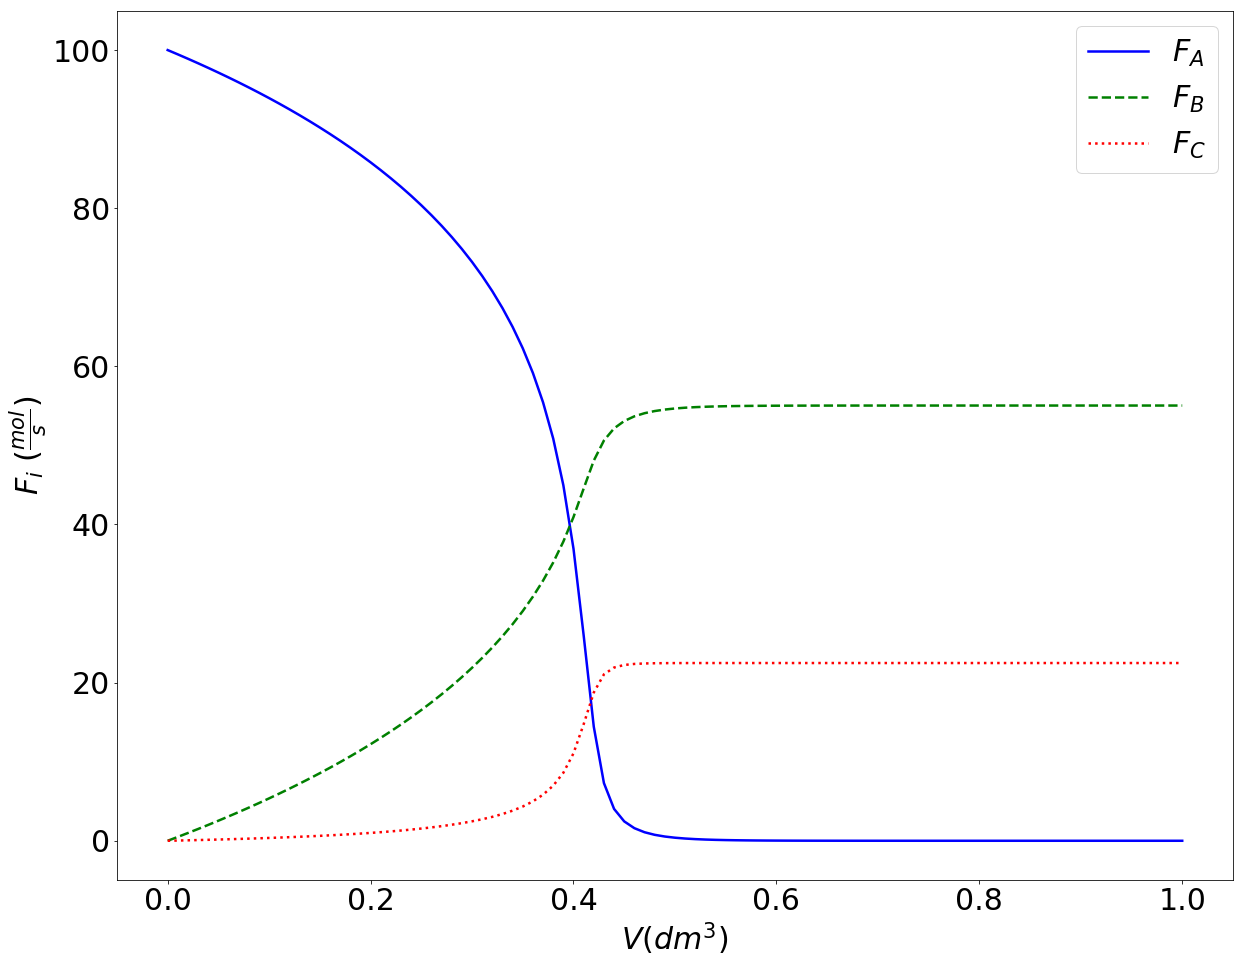

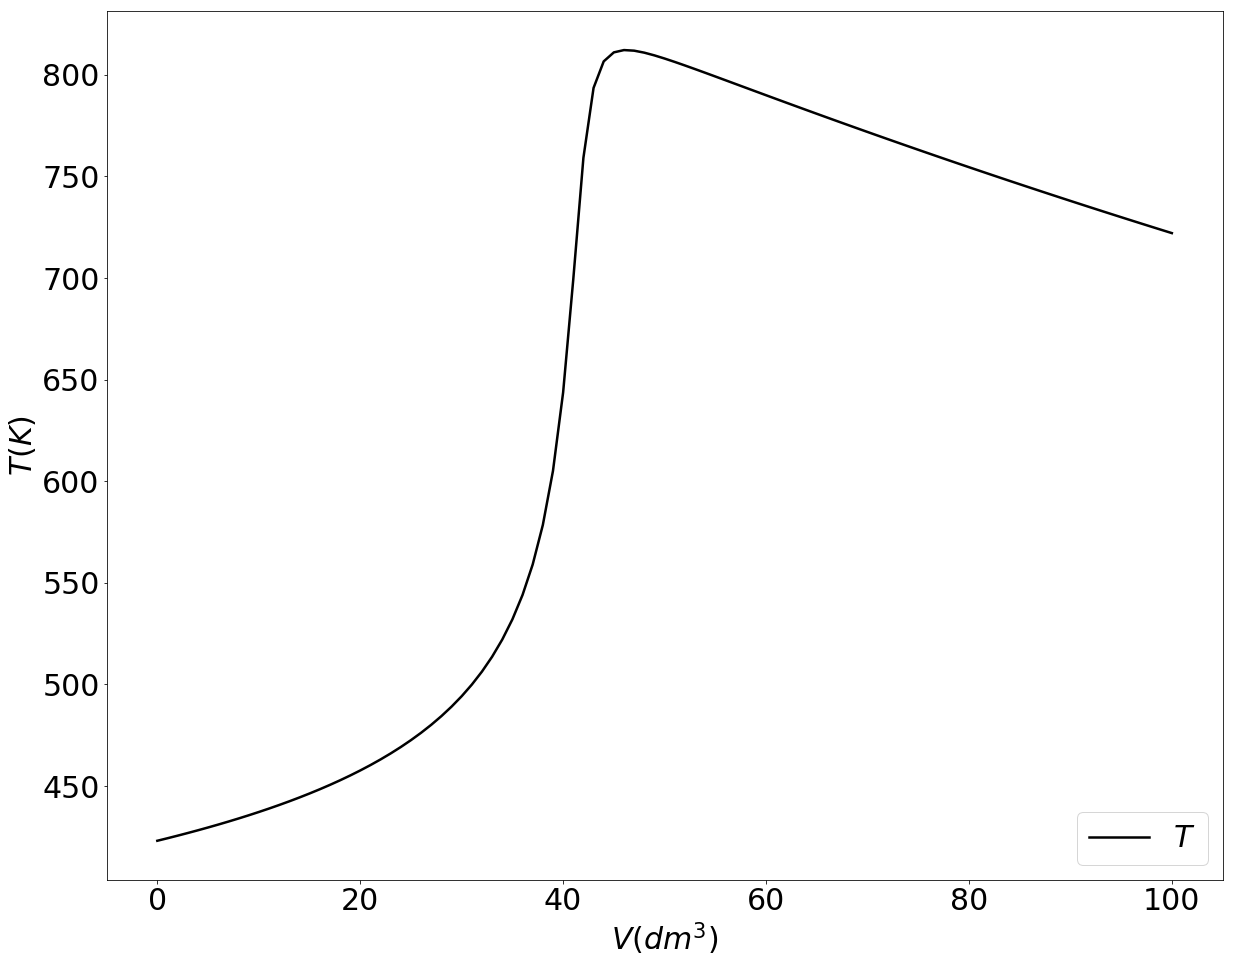

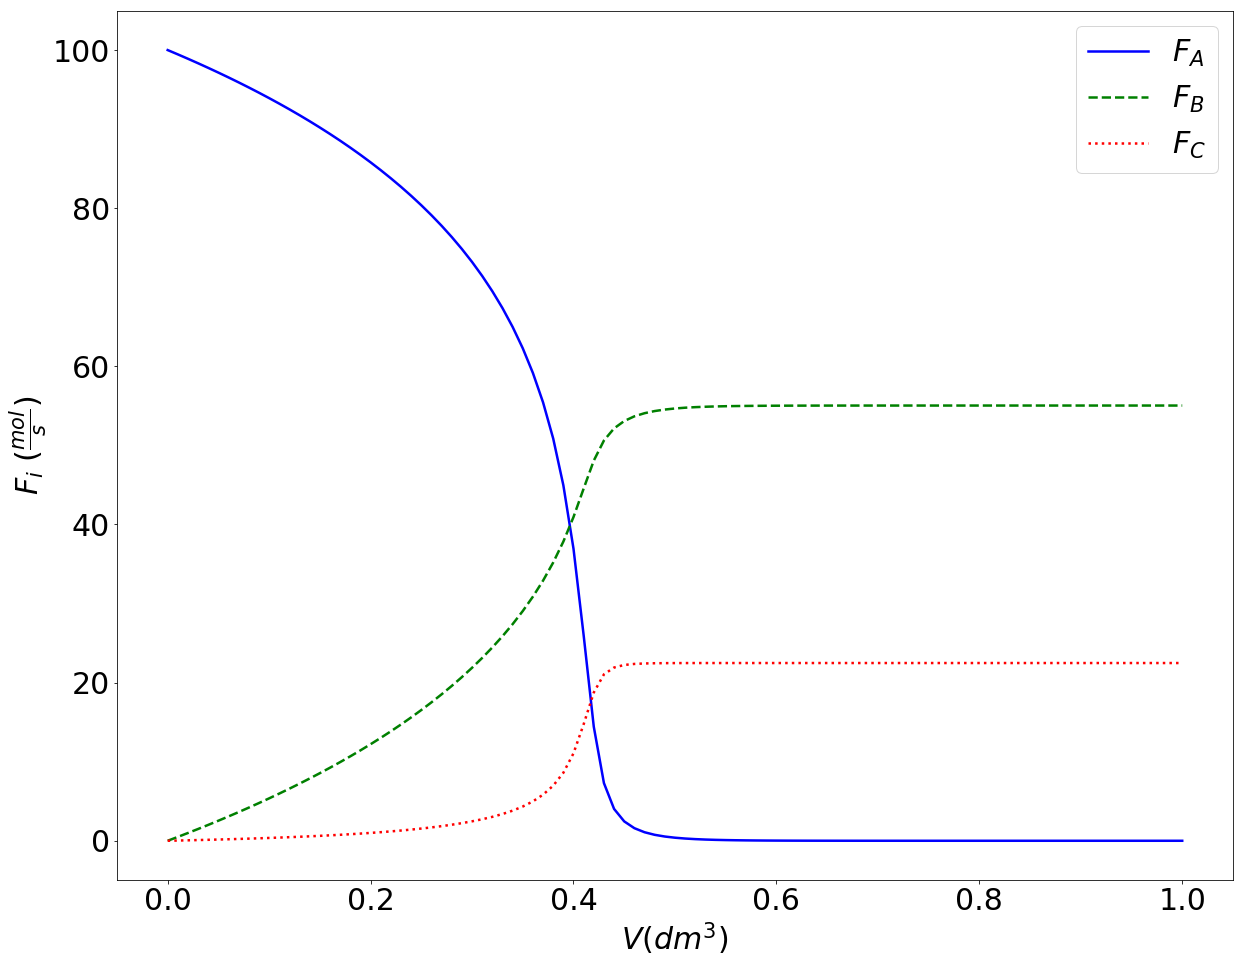

In [36]:
solve_ODEs_CA3()

Figure 1: T-vs-V


Figure 2: F-vs-V